# Flowers 102

In [1]:
import matplotlib.pyplot as plt
def plot(x,title=None):
    # Move tensor to CPU and convert to numpy
    x_np = x.cpu().numpy()

    # If tensor is in (C, H, W) format, transpose to (H, W, C)
    if x_np.shape[0] == 3 or x_np.shape[0] == 1:
        x_np = x_np.transpose(1, 2, 0)

    # If grayscale, squeeze the color channel
    if x_np.shape[2] == 1:
        x_np = x_np.squeeze(2)

    x_np = x_np.clip(0, 1)

    fig, ax = plt.subplots()
    if len(x_np.shape) == 2:  # Grayscale
        im = ax.imshow(x_np, cmap='gray')
    else:
        im = ax.imshow(x_np)
    plt.title(title)
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [2]:
!wget https://gist.githubusercontent.com/JosephKJ/94c7728ed1a8e0cd87fe6a029769cde1/raw/403325f5110cb0f3099734c5edb9f457539c77e9/Oxford-102_Flower_dataset_labels.txt
!wget https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!unzip 'flower_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: flower_data/train/7/image_07232.jpg  
  inflating: flower_data/train/7/image_08101.jpg  
  inflating: flower_data/train/7/image_07226.jpg  
  inflating: flower_data/train/7/image_07227.jpg  
  inflating: flower_data/train/7/image_08100.jpg  
  inflating: flower_data/train/7/image_07233.jpg  
   creating: flower_data/train/29/
  inflating: flower_data/train/29/image_04152.jpg  
  inflating: flower_data/train/29/image_04147.jpg  
  inflating: flower_data/train/29/image_04153.jpg  
  inflating: flower_data/train/29/image_04151.jpg  
  inflating: flower_data/train/29/image_04150.jpg  
  inflating: flower_data/train/29/image_04144.jpg  
  inflating: flower_data/train/29/image_04140.jpg  
  inflating: flower_data/train/29/image_04154.jpg  
  inflating: flower_data/train/29/image_04155.jpg  
  inflating: flower_data/train/29/image_04141.jpg  
  inflating: flower_data/train/29/image_04157.jpg  
  inflating: flower_data/train/29/im

In [3]:
import torch
from torchvision import datasets, transforms
import os
import pandas as pd

data_dir = '/content/flower_data/'
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transform)
dataset_labels = pd.read_csv('Oxford-102_Flower_dataset_labels.txt', header=None)[0].str.replace("'", "").str.strip()

dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False)

In [4]:
images, labels = next(iter(dataloader))

print(f"Images tensor shape: {images.shape}")
print(f"Labels tensor shape: {labels.shape}")


Images tensor shape: torch.Size([6552, 3, 224, 224])
Labels tensor shape: torch.Size([6552])


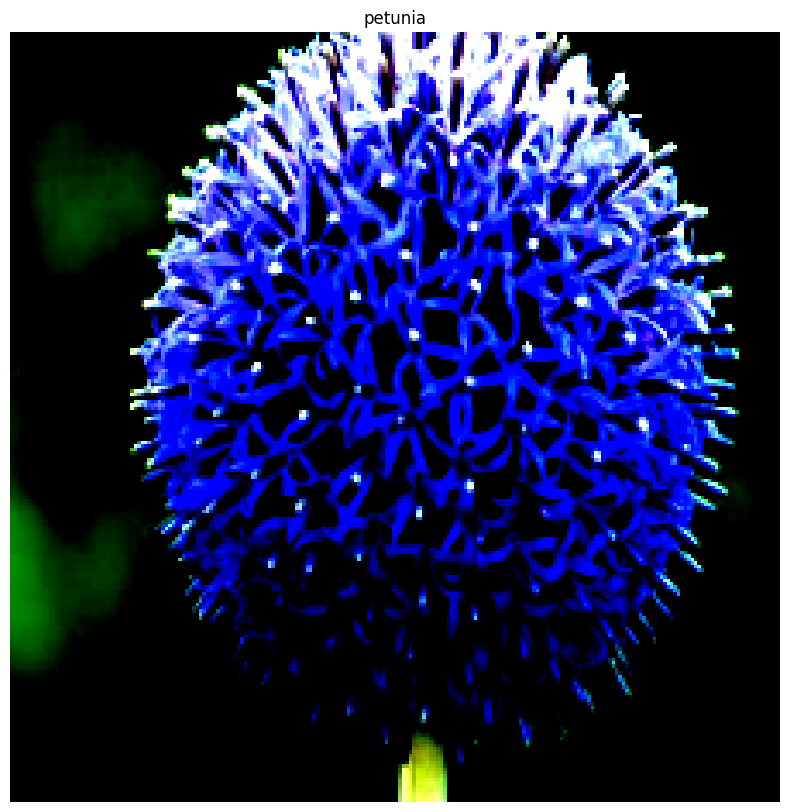

In [5]:
i = 50
plot(images[i],dataset_labels[i]);

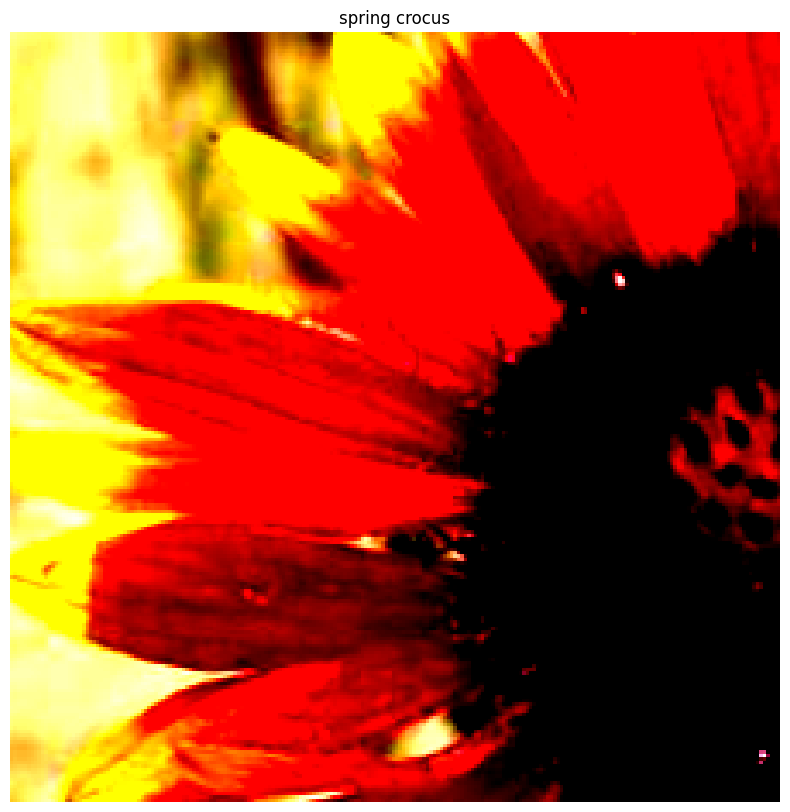

In [6]:
i = 66
plot(images[i],dataset_labels[i]);

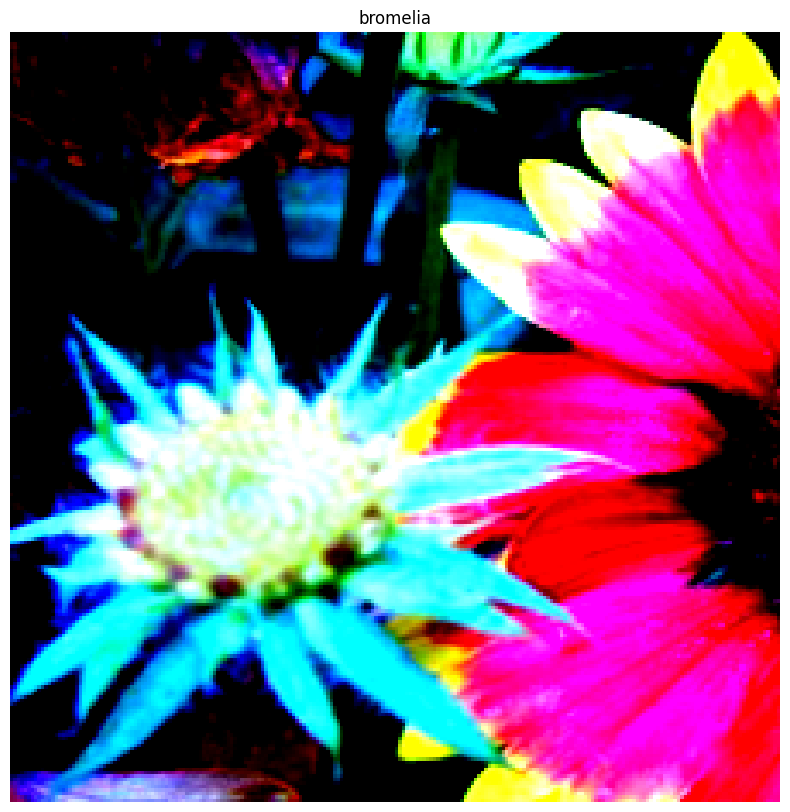

In [7]:
i = 98
plot(images[i],dataset_labels[i]);

In [19]:
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset
trainset = datasets.ImageFolder(root='flower_data/train', transform=transform)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True)

In [20]:
# Load the pre-trained AlexNet model
alexnet = torchvision.models.alexnet(pretrained=True)
num_classes = len(trainset.classes)
alexnet.classifier[6] = torch.nn.Linear(alexnet.classifier[6].in_features, num_classes)

# Fetch a batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
dataset_labels = pd.read_csv('Oxford-102_Flower_dataset_labels.txt', header=None)[0].str.replace("'", "").str.strip()
flower_names = dataset_labels.tolist()

In [22]:
outputs = alexnet(images)
_, predicted = torch.max(outputs, 1)
predicted_flower_names = [flower_names[p.item()] for p in predicted]

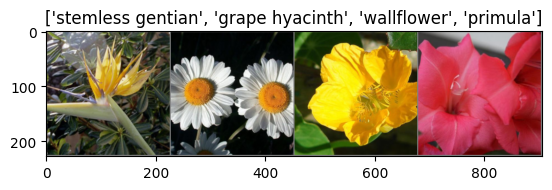

In [23]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Plot the images and their predicted labels
imshow(torchvision.utils.make_grid(images), title=[name for name in predicted_flower_names])

In [24]:
# Adjust the final layer of AlexNet
num_classes = len(trainset.classes)
alexnet.classifier[6] = torch.nn.Linear(alexnet.classifier[6].in_features, num_classes)

In [25]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
alexnet = alexnet.to(device)

In [28]:
num_epochs = 1

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move data to the device
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

print('Finished Training')


Epoch 1, Loss: 2.062453852227283
Finished Training


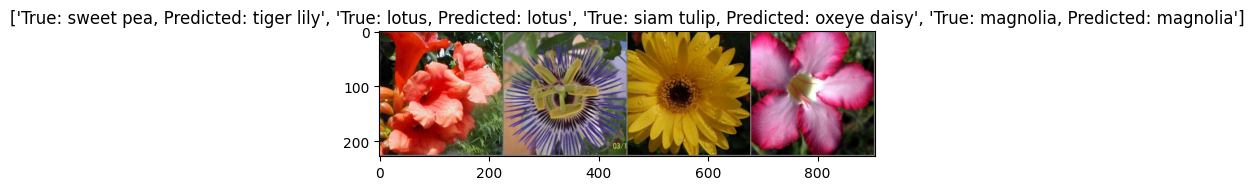

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Move the images to the same device as the model
images = images.to(device)
labels = labels.to(device)

# Predict using the trained model
outputs = alexnet(images)
_, predicted = torch.max(outputs, 1)
predicted_flower_names = [flower_names[p.item()] for p in predicted]
true_flower_names = [flower_names[label.item()] for label in labels]

# If you want to display the images using imshow, move them back to CPU
images = images.cpu()

# Display the images and their labels
imshow(torchvision.utils.make_grid(images), title=[f"True: {true}, Predicted: {pred}" for true, pred in zip(true_flower_names, predicted_flower_names)])